In [1]:
import numpy as np
import matplotlib.pyplot as plt

Este corto video explica los tipos de convolución

https://www.youtube.com/watch?v=ZsKAQTk6_pI

Como ven en el video hay varios modos de convoluciòn. El full, el valid y el same. Se pueden convolucionar señales de diferente dimensión.

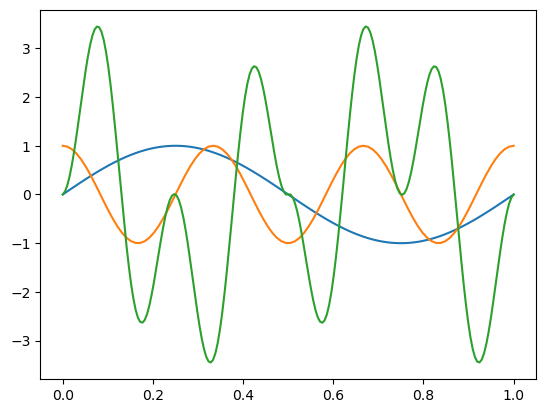

In [2]:
t=np.linspace(0, 1, 100)
x=np.sin(2*np.pi*t)
y=np.cos(6*np.pi*t)
z=np.convolve(x, y, 'full')
plt.plot(t, x)
plt.plot(t, y)
t2=np.linspace(0,1, 199)
plt.plot(t2, z)

Como se ve, para graficar la convolución z hay que usar 199 puntos. Esto se debe a que el modo full tiene N+M-1 puntos.

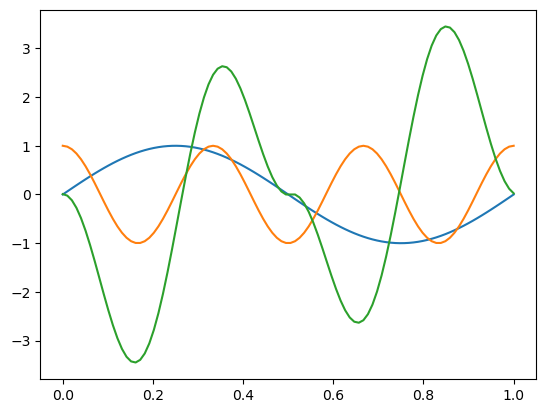

In [3]:
t=np.linspace(0, 1, 100)
x=np.sin(2*np.pi*t)
y=np.cos(6*np.pi*t)
z=np.convolve(x, y, 'same')
plt.plot(t, x)
plt.plot(t, y)
plt.plot(t, z)


En este caso la convolución tiene igual cantidad de puntos que una de las señales. O sea 100.

[-1.77842491e-15]


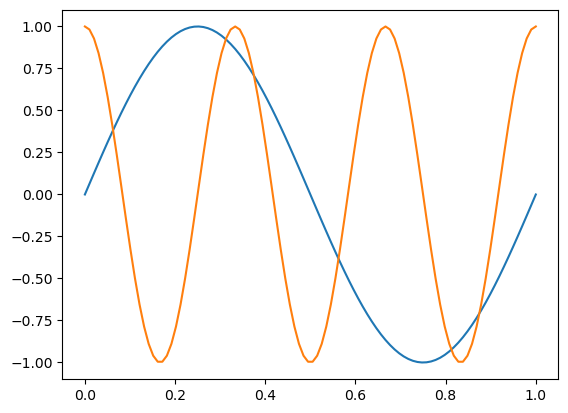

In [4]:
t=np.linspace(0, 1, 100)
x=np.sin(2*np.pi*t)
y=np.cos(6*np.pi*t)
z=np.convolve(x, y, 'valid')
plt.plot(t, x)
plt.plot(t, y)
print(z)


Este modo tiene N-M+1 componentes. En este caso da una sola. Por eso no está graficada sino impresa.

Probemos algùn còdigo a mano.

In [5]:
def sig_square(x):
  return 0 if x < 3 or x > 5 else 2

def sig_triag(x):
  return 0 if x < 0 or x > 2 else x

# First signal (square pulse)
sig1 = [sig_square(x/100) for x in range(1000)]

# Seconds signal (triangle pulse)
sig2 = [sig_triag(x/100) for x in range(2000)]



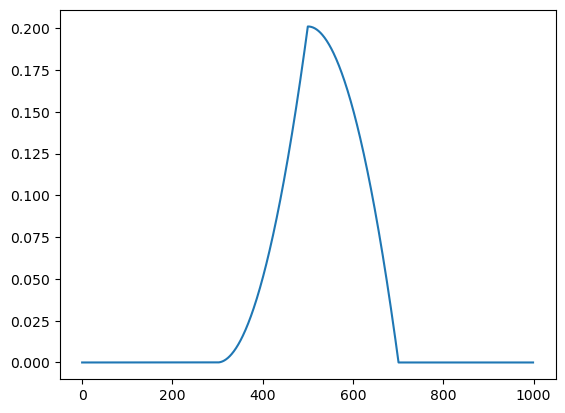

In [6]:


# Pre-allocate correlation array
conv =np.zeros(len(sig1))

# Go through lag components one-by-one
for l in range(len(sig1)):
  for i in range(len(sig2)):
    if i<l:
      conv[l] =conv[l] +sig1[l-i] * sig2[i]
    else:
      conv[l]= conv[l]
plt.plot(conv/len(sig2))




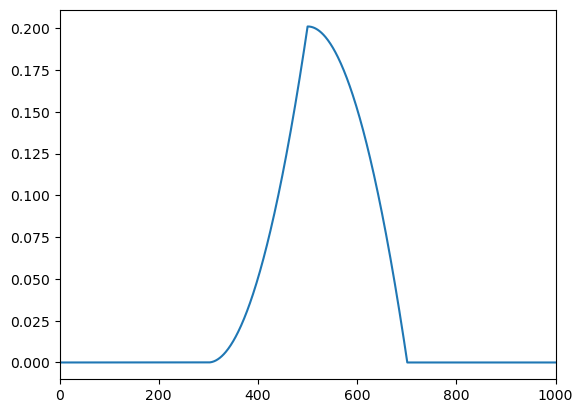

In [7]:
conv = np.convolve(sig1, sig2, mode='full')

conv /= len(sig2) # Normalize

plt.xlim(0,1000)
plt.plot(conv)

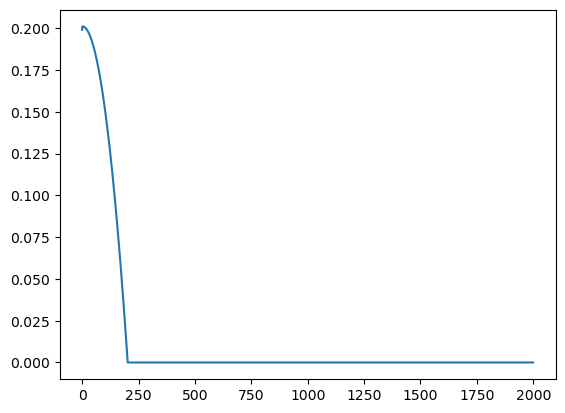

In [8]:
conv = np.convolve(sig1, sig2, mode='same')

conv /= len(sig2) # Normalize

plt.plot(conv)

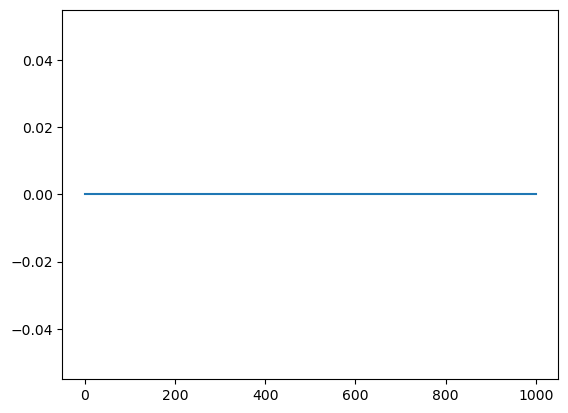

In [9]:
conv = np.convolve(sig1, sig2, mode='valid')

conv /= len(sig2) # Normalize

plt.plot(conv)

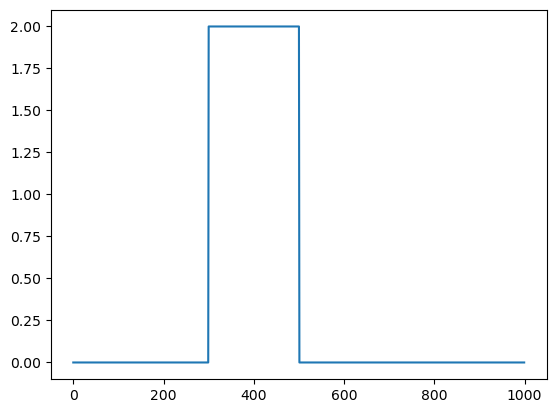

In [10]:
plt.plot(sig1)

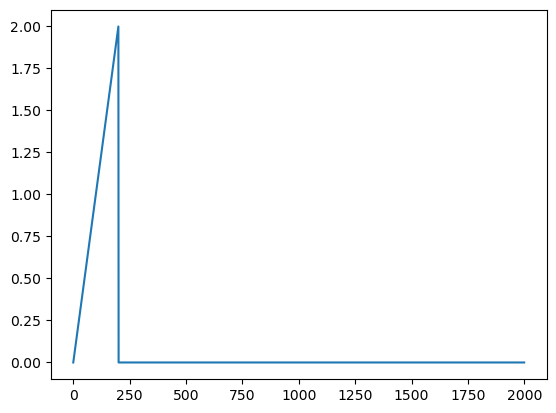

In [11]:
plt.plot(sig2)

Como las señales no se solapan completamente en ningun momento, la convolución con el modo "valid" es de esperar que dé cero siempre.